In [ ]:
import numpy as np
from PIL import Image
import os

# Config
image_folder = 'stylegan3_generated'             # folder with 10,000 fake RGB images
label_folder = 'predicted_masks_png'             # folder with predicted pseudo labels (PNG masks)
image_size = (256, 256)                          # match original dataset
max_images = 10000                               # limit if needed

# Collect sorted file names (assumes naming like fake_0001.png etc.)
image_files = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])
label_files = sorted([f for f in os.listdir(label_folder) if f.endswith('.png')])

assert len(image_files) == len(label_files), "Mismatch between images and labels!"
image_files = image_files[:max_images]
label_files = label_files[:max_images]

print(f"Found {len(image_files)} fake samples.")


Data shape: (10000, 256, 256, 3), dtype: float32, min: 0.0, max: 255.0
Sample shape: (256, 256, 3), dtype: float32, min: 19.0, max: 244.0


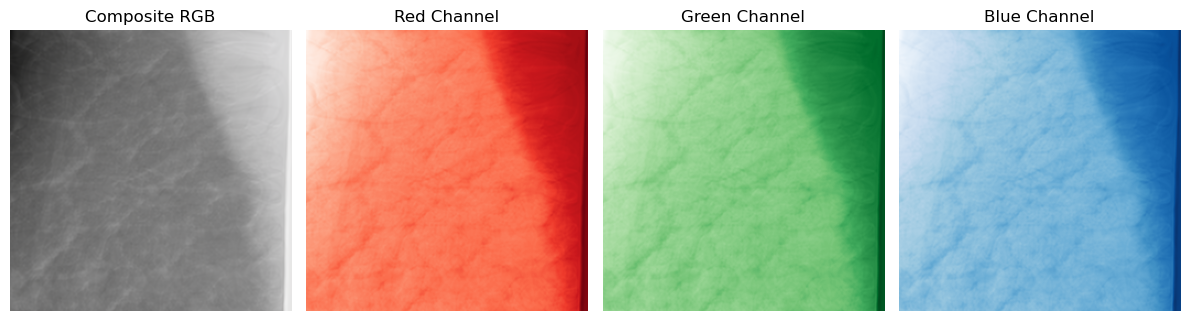


R channel - min: 20.0, max: 244.0, mean: 129.89, non-zero: 65536

G channel - min: 20.0, max: 244.0, mean: 129.68, non-zero: 65536

B channel - min: 19.0, max: 244.0, mean: 129.59, non-zero: 65536


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import os


# Load the file
data = np.load('data/Kvasir-SEG/datamodel/test_data_10kcbis_0.npy')  # or your exact file path
# data = np.load('generated_data_10k.npy')  # or your exact file path
# data = np.load('CBIS_DDSM_split_clean/datamodel/train_data_ogcbis.npy')  # or your exact file path
print(f'Data shape: {data.shape}, dtype: {data.dtype}, min: {data.min()}, max: {data.max()}')
sample = data[19]  # look at the first sample

print(f"Sample shape: {sample.shape}, dtype: {sample.dtype}, min: {sample.min()}, max: {sample.max()}")

# Show full image
plt.figure(figsize=(12, 4))

# RGB composite
plt.subplot(1, 4, 1)
plt.imshow(sample.astype(np.uint8))  # convert float to uint8 for display
plt.title("Composite RGB")
plt.axis('off')

# R channel
plt.subplot(1, 4, 2)
plt.imshow(sample[:, :, 0], cmap='Reds')
plt.title("Red Channel")
plt.axis('off')

# G channel
plt.subplot(1, 4, 3)
plt.imshow(sample[:, :, 1], cmap='Greens')
plt.title("Green Channel")
plt.axis('off')

# B channel
plt.subplot(1, 4, 4)
plt.imshow(sample[:, :, 2], cmap='Blues')
plt.title("Blue Channel")
plt.axis('off')

plt.tight_layout()
plt.show()

# Print channel-wise stats
for i, c in enumerate(['R', 'G', 'B']):
    channel = sample[:, :, i]
    print(f"\n{c} channel - min: {channel.min()}, max: {channel.max()}, mean: {channel.mean():.2f}, non-zero: {np.count_nonzero(channel)}")


Sample shape: (256, 256), dtype: int32, min: 0, max: 255


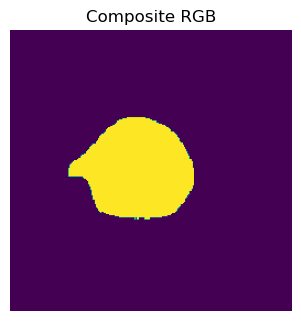

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Load the file
# label = np.load('CBIS_DDSM_split_clean/datamodel/train_label_ogcbis.npy')  # or your exact file path
label = np.load('generated_label_10kcbis_1.npy')
sample = label[19]  # look at the first sample

print(f"Sample shape: {sample.shape}, dtype: {sample.dtype}, min: {sample.min()}, max: {sample.max()}")

# Show full image
plt.figure(figsize=(12, 4))

# RGB composite
plt.subplot(1, 4, 1)
plt.imshow(sample.astype(np.uint8))  # convert float to uint8 for display
plt.title("Composite RGB")
plt.axis('off')

# # R channel
# plt.subplot(1, 4, 2)
# plt.imshow(sample[:, :, 0], cmap='Reds')
# plt.title("Red Channel")
# plt.axis('off')

# # G channel
# plt.subplot(1, 4, 3)
# plt.imshow(sample[:, :, 1], cmap='Greens')
# plt.title("Green Channel")
# plt.axis('off')

# # B channel
# plt.subplot(1, 4, 4)
# plt.imshow(sample[:, :, 2], cmap='Blues')
# plt.title("Blue Channel")
# plt.axis('off')

plt.tight_layout()
plt.show()

# Print channel-wise stats
# for i, c in enumerate(['R', 'G', 'B']):
#     channel = sample[:, :, i]
#     print(f"\n{c} channel - min: {channel.min()}, max: {channel.max()}, mean: {channel.mean():.2f}, non-zero: {np.count_nonzero(channel)}")


In [ ]:
# all stylegan3 generated images as npy file

# import os
# import numpy as np
# from PIL import Image
# from numpy.lib.format import open_memmap

# # ==== CONFIG ====
# image_dir = "stylegan3_generated"         # folder with your 10,000 PNG/JPG
# output_npy = "stylegan3_all_10k.npy"      # one big npy
# target_size = (256, 256)                  # must match repo format

# files = sorted([f for f in os.listdir(image_dir)
#                 if f.lower().endswith((".png", ".jpg", ".jpeg"))])
# N = len(files)
# H, W = target_size[1], target_size[0]
# C = 3
# print(f"Found {N} images")

# # Create .npy file and stream-write into it
# mm = open_memmap(output_npy, mode="w+", dtype=np.float32, shape=(N, H, W, C))

# for i, fn in enumerate(files):
#     img = Image.open(os.path.join(image_dir, fn)).convert("RGB").resize((W, H), Image.BILINEAR)
#     mm[i] = np.array(img, dtype=np.float32)  # stays in [0..255]
#     if (i + 1) % 500 == 0:
#         print(f"Wrote {i+1}/{N}")

# # Ensure data is flushed
# del mm

# # Quick sanity check
# chk = np.load(output_npy, mmap_mode="r")
# print("Saved:", output_npy, "shape:", chk.shape, "dtype:", chk.dtype,
#       "min:", float(chk.min()), "max:", float(chk.max()))


Found 10000 images
Wrote 500/10000
Wrote 1000/10000
Wrote 1500/10000
Wrote 2000/10000
Wrote 2500/10000
Wrote 3000/10000
Wrote 3500/10000
Wrote 4000/10000
Wrote 4500/10000
Wrote 5000/10000
Wrote 5500/10000
Wrote 6000/10000
Wrote 6500/10000
Wrote 7000/10000
Wrote 7500/10000
Wrote 8000/10000
Wrote 8500/10000
Wrote 9000/10000
Wrote 9500/10000
Wrote 10000/10000
Saved: stylegan3_all_10k.npy shape: (10000, 256, 256, 3) dtype: float32 min: 0.0 max: 255.0


In [ ]:
# select a subset of stylegan3 generated images

import os
import numpy as np
from PIL import Image
from numpy.lib.format import open_memmap

# ==== CONFIG ====
image_dir = "stylegan3_generated"       # folder with your PNG/JPG images
base_name = "generated_data"     # base file name (number will be added automatically)
n_select = 600                          # number of images to randomly sample
target_size = (256, 256)                # must match repo format
seed = 42                               # random seed
replace = False                         # True = sample with replacement, False = without

# ==== AUTO NAME OUTPUT ====
output_npy = f"{base_name}_{n_select}.npy"

# ==== LIST AND SAMPLE FILES ====
exts = (".png", ".jpg", ".jpeg")
files = sorted([f for f in os.listdir(image_dir) if f.lower().endswith(exts)])
total = len(files)

if total == 0:
    raise RuntimeError(f"No images found in {image_dir}")

if not replace and n_select > total:
    raise ValueError(f"Cannot sample {n_select} images without replacement from only {total} available.")

rng = np.random.RandomState(seed)
if replace:
    idx = rng.randint(0, total, size=n_select)
else:
    idx = rng.choice(total, size=n_select, replace=False)

# ==== CREATE .NPY FILE ====
H, W = target_size[1], target_size[0]
C = 3
mm = open_memmap(output_npy, mode="w+", dtype=np.float32, shape=(n_select, H, W, C))

for i, j in enumerate(idx):
    fn = files[j]
    path = os.path.join(image_dir, fn)
    img = Image.open(path).convert("RGB").resize((W, H), Image.BILINEAR)
    mm[i] = np.asarray(img, dtype=np.float32)  # [0..255], float32
    if (i + 1) % 100 == 0 or i == n_select - 1:
        print(f"Wrote {i+1}/{n_select}")

# Flush to disk
del mm

# ==== CHECK ====
chk = np.load(output_npy, mmap_mode="r")
print(f"✅ Saved: {output_npy}")
print(f"   Shape: {chk.shape}, Dtype: {chk.dtype}, Min: {float(chk.min())}, Max: {float(chk.max())}")


Wrote 100/600
Wrote 200/600
Wrote 300/600
Wrote 400/600
Wrote 500/600
Wrote 600/600
✅ Saved: generated_data_600.npy
   Shape: (600, 256, 256, 3), Dtype: float32, Min: 0.0, Max: 255.0


In [3]:
# generate npy file from pseudo labels prediction

# fake label npy generation (natural numeric sort) -> {0,255}
import os, re, numpy as np
from PIL import Image

label_folder = '1st_PL_trans_unet_Atvmf_10k2018_1_s0/Image_10k/Seg'   # your folder
output_npy   = 'generated_label_10k2018_2.npy'
target_size  = (256, 256)                      # (W, H)

def natural_key(s: str):
    return [int(t) if t.isdigit() else t.lower() for t in re.split(r'(\d+)', s)]

label_files = sorted(
    [f for f in os.listdir(label_folder) if f.lower().endswith('.png')],
    key=natural_key
)

labels_np = []
W, H = target_size
for fname in label_files:
    path = os.path.join(label_folder, fname)
    mask = Image.open(path).convert('L').resize((W, H), Image.NEAREST)
    m = np.array(mask)
    m = (m > 127).astype(np.uint8) * 255   # <-- make {0,255}
    labels_np.append(m.astype(np.int32))

labels_np = np.stack(labels_np, axis=0)  # (N, H, W)
np.save(output_npy, labels_np)
print("Saved:", output_npy, labels_np.shape, labels_np.dtype, labels_np.min(), labels_np.max())



Saved: generated_label_10k2018_2.npy (10000, 256, 256) int32 0 255


In [46]:
# --- Fake empty label generation: named by count ---
import numpy as np

# ===== CONFIG =====
base_name = "test_label_"   # will become generated_label_600.npy
n_samples = 600                 # number of fake samples
height, width = 256, 256        # match repo format (H, W)
save_dir = "."                  # folder where to save

# ---- build filename ----
output_label_npy = f"{save_dir}/{base_name}_{n_samples}.npy"

# ---- make & save ----
# All background: 0, dtype=uint8, values in {0,255} convention (but here all 0)
labels = np.zeros((n_samples, height, width), dtype=np.uint8)
np.save(output_label_npy, labels)

# ---- check ----
loaded = np.load(output_label_npy)
print("Saved:", output_label_npy)
print("Shape:", loaded.shape, "Dtype:", loaded.dtype, "Min/Max:", loaded.min(), loaded.max())



Saved: ./test_label__600.npy
Shape: (600, 256, 256) Dtype: uint8 Min/Max: 0 0


In [4]:
# Append Your 10,000 Fake Images and Pseudo Labels

import numpy as np

# Load original fold 1
real_x = np.load('data/Kvasir-SEG/datamodel/train_data_og2018.npy')   # shape: (N1, 256, 256, 3)
real_y = np.load('data/Kvasir-SEG/datamodel/train_label_og2018.npy')  # shape: (N1, 256, 256)

# Load your StyleGAN3-generated data and pseudo labels
fake_x = np.load('generated_data_10k2018.npy')      # shape: (10000, 256, 256, 3)
fake_y = np.load('generated_label_10k2018_2.npy')                # shape: (10000, 256, 256)

# Sanity check
assert fake_x.shape[0] == fake_y.shape[0], "Mismatch between fake images and labels"
assert real_x.shape[1:] == fake_x.shape[1:], "Mismatch in image size or channels"
assert real_y.shape[1:] == fake_y.shape[1:], "Mismatch in label size"

# Merge
aug_x = np.concatenate([real_x, fake_x], axis=0)
aug_y = np.concatenate([real_y, fake_y], axis=0)

# Save back
np.save('data/Kvasir-SEG/datamodel/train_data_10k2018_2.npy', aug_x)
np.save('data/Kvasir-SEG/datamodel/train_label_10k2018_2.npy', aug_y)

print("✅ Merged and saved! New training set size:", aug_x.shape[0])


✅ Merged and saved! New training set size: 11885


In [7]:
import os
import shutil
import random
import hashlib
from pathlib import Path
import csv

# ====== CONFIG ======
BASE = Path("new_dataset/isic2018")        # original data root with old train/ and val/
OUT_BASE = BASE.parent / "isic2018_split"  # new root for the split dataset
RATIOS = (0.7, 0.15, 0.15)               # train, val, test
IMG_EXT = ".png"
MASK_EXT = ".png"
SEED = 42

# ====== HELPERS ======
def numeric_key(p: Path):
    s = p.stem
    return (int(s) if s.isdigit() else s, p.suffix)

def paired_records(split_name: str):
    img_dir = BASE / split_name / "images"
    mask_dir = BASE / split_name / "masks"
    imgs = sorted(img_dir.glob(f"*{IMG_EXT}"), key=numeric_key)
    for img in imgs:
        mask = mask_dir / (img.stem + MASK_EXT)
        if not mask.exists():
            raise FileNotFoundError(f"Mask missing for {img} (expected {mask})")
        yield img, mask, split_name

def uniq_name(img_path: Path, split_tag: str, uid: int):
    h = hashlib.md5(str(img_path.relative_to(BASE)).encode("utf-8")).hexdigest()[:8]
    return f"{split_tag}_{img_path.stem}_{uid:06d}_{h}.png"

def save_split(split_name: str, pairs):
    out_img = OUT_BASE / split_name / "images"
    out_msk = OUT_BASE / split_name / "masks"
    out_img.mkdir(parents=True, exist_ok=True)
    out_msk.mkdir(parents=True, exist_ok=True)

    rows = []
    for uid, (img, msk, src_split) in enumerate(pairs, start=1):
        new_name = uniq_name(img, src_split, uid)
        shutil.copy2(img, out_img / new_name)
        shutil.copy2(msk, out_msk / new_name)
        rows.append([split_name, new_name, str(img), str(msk), src_split])
    return rows

# ====== COLLECT ======
pool = list(paired_records("train")) + list(paired_records("val"))
print(f"Found total pairs: {len(pool)}")

# ====== SHUFFLE ======
random.seed(SEED)
random.shuffle(pool)

# ====== SPLIT ======
r_train, r_val, r_test = RATIOS
n = len(pool)
n_train = int(r_train * n)
n_val = int(r_val * n)
train_pairs = pool[:n_train]
val_pairs   = pool[n_train:n_train+n_val]
test_pairs  = pool[n_train+n_val:]

print(f"Split sizes -> train: {len(train_pairs)}, val: {len(val_pairs)}, test: {len(test_pairs)}")

# ====== WRITE OUT ======
OUT_BASE.mkdir(parents=True, exist_ok=True)
manifest_path = OUT_BASE / "manifest.csv"
with open(manifest_path, "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(["dest_split","new_filename","src_image","src_mask","src_split"])
    rows = []
    rows += save_split("train", train_pairs)
    rows += save_split("val",   val_pairs)
    rows += save_split("test",  test_pairs)
    w.writerows(rows)

print("Done. New split saved to:", OUT_BASE)


Found total pairs: 2694
Split sizes -> train: 1885, val: 404, test: 405
Done. New split saved to: new_dataset\isic2018_split


In [10]:
# create better split train val test

import os
import csv
from pathlib import Path
import numpy as np
from PIL import Image
import shutil

# ========= CONFIG =========
SRC_SPLIT_ROOT = Path("new_dataset/isic2018_split")   # has train/val/test with images/ & masks/
OUT_SPLIT_ROOT = SRC_SPLIT_ROOT.parent / "isic2018_split_clean"  # will be created
DATAMODEL_DIR  = OUT_SPLIT_ROOT / "datamodel"                      # npy goes here
TARGET_HW = (256, 256)  # (H, W)
IMG_EXT = ".png"
MASK_EXT = ".png"

# ========= HELPERS =========
def numeric_key(p: Path):
    s = p.stem
    return (int(s) if s.isdigit() else s.lower(), p.suffix.lower())

def load_image(path: Path):
    im = Image.open(path).convert("RGB").resize((TARGET_HW[1], TARGET_HW[0]), Image.BILINEAR)
    return np.asarray(im, dtype=np.float32)  # (H,W,3) in [0,255]

def load_mask(path: Path):
    m = Image.open(path).convert("L").resize((TARGET_HW[1], TARGET_HW[0]), Image.NEAREST)
    arr = np.asarray(m, dtype=np.int32)
    # robustly binarize to {0,255}
    if not (np.array_equal(np.unique(arr), np.array([0, 255]))):
        arr = np.where(arr >= 128, 255, 0).astype(np.int32)
    return arr

def gather_pairs(split_root: Path):
    img_dir = split_root / "images"
    msk_dir = split_root / "masks"
    imgs = sorted([p for p in img_dir.glob(f"*{IMG_EXT}") if p.is_file()], key=numeric_key)
    msks = sorted([p for p in msk_dir.glob(f"*{MASK_EXT}") if p.is_file()], key=numeric_key)

    # pair by exact same filename (strict)
    img_map = {p.name: p for p in imgs}
    msk_map = {p.name: p for p in msks}
    names = sorted(set(img_map.keys()) & set(msk_map.keys()), key=lambda n: numeric_key(Path(n)))
    missing_i = [n for n in img_map if n not in msk_map]
    missing_m = [n for n in msk_map if n not in img_map]
    if missing_i or missing_m:
        raise RuntimeError(f"Unpaired files: missing masks for {len(missing_i)} images, "
                           f"missing images for {len(missing_m)} masks")

    pairs = [(img_map[n], msk_map[n]) for n in names]
    return pairs

def normalize_and_build(split_name: str):
    # 1) read source pairs (strict filename match)
    src_split = SRC_SPLIT_ROOT / split_name
    pairs = gather_pairs(src_split)

    # 2) write normalized copies with 000000.png naming into OUT_SPLIT_ROOT
    out_img_dir = OUT_SPLIT_ROOT / split_name / "images"
    out_msk_dir = OUT_SPLIT_ROOT / split_name / "masks"
    out_img_dir.mkdir(parents=True, exist_ok=True)
    out_msk_dir.mkdir(parents=True, exist_ok=True)

    index_csv = OUT_SPLIT_ROOT / split_name / "index.csv"
    with open(index_csv, "w", newline="") as f:
        w = csv.writer(f)
        w.writerow(["idx","new_name","src_image","src_mask"])
        for i, (pi, pm) in enumerate(pairs):
            new_name = f"{i:06d}.png"
            shutil.copy2(pi, out_img_dir / new_name)
            shutil.copy2(pm, out_msk_dir / new_name)
            w.writerow([i, new_name, str(pi), str(pm)])

    # 3) build npy from normalized folder in strict order 000000.png..N-1.png
    imgs = []
    msks = []
    for i in range(len(pairs)):
        name = f"{i:06d}.png"
        imgs.append(load_image(out_img_dir / name))
        msks.append(load_mask(out_msk_dir / name))

    X = np.stack(imgs, axis=0).astype(np.float32)   # (N,H,W,3) [0..255]
    Y = np.stack(msks, axis=0).astype(np.int32)     # (N,H,W) in {0,255}

    # sanity: assert filenames align 1:1
    assert X.shape[0] == Y.shape[0], "X and Y length mismatch"

    # 4) save npy
    DATAMODEL_DIR.mkdir(parents=True, exist_ok=True)
    np.save(DATAMODEL_DIR / f"{split_name}_data_og2018.npy", X)
    np.save(DATAMODEL_DIR / f"{split_name}_label_og2018.npy", Y)

    # quick report
    uniq = np.unique(Y)
    print(f"[{split_name}] N={len(pairs)}  "
          f"X:{X.shape} {X.dtype} [{X.min():.1f},{X.max():.1f}]  "
          f"Y:{Y.shape} {Y.dtype} uniq={uniq[:6]}{'...' if uniq.size>6 else ''}")
    return X, Y

# ========= RUN FOR ALL SPLITS =========
(Xtr, Ytr) = normalize_and_build("train")
(Xva, Yva) = normalize_and_build("val")
(Xte, Yte) = normalize_and_build("test")

print("\nSaved to:", DATAMODEL_DIR)


[train] N=1885  X:(1885, 256, 256, 3) float32 [0.0,255.0]  Y:(1885, 256, 256) int32 uniq=[  0 255]
[val] N=404  X:(404, 256, 256, 3) float32 [0.0,255.0]  Y:(404, 256, 256) int32 uniq=[  0 255]
[test] N=405  X:(405, 256, 256, 3) float32 [0.0,255.0]  Y:(405, 256, 256) int32 uniq=[  0 255]

Saved to: new_dataset\isic2018_split_clean\datamodel


In [29]:
import os
import shutil
from pathlib import Path
import csv
import hashlib

# ===== CONFIG =====
SRC_ROOT = Path("stylegan3_generated_cbis")   # contains subfolders 'benign' and 'malignant'
BENIGN_DIR = SRC_ROOT / "benign"
MALIGN_DIR = SRC_ROOT / "malignant"

OUT_ROOT = SRC_ROOT.parent / "stylegan3_cbis_10k_merged"   # new folder to create
OUT_IMG_DIR = OUT_ROOT / "images"
MANIFEST = OUT_ROOT / "manifest.csv"

# Allowed image extensions (lowercase)
EXTS = {".png", ".jpg", ".jpeg", ".webp"}

# ===== HELPERS =====
def numeric_key(p: Path):
    """Sort with numeric preference if stem is digits; else lexicographic."""
    s = p.stem
    return (int(s) if s.isdigit() else s.lower(), p.suffix.lower())

def list_images(folder: Path):
    files = [p for p in folder.iterdir() if p.is_file() and p.suffix.lower() in EXTS]
    files.sort(key=numeric_key)
    return files

def new_name(prefix: str, idx: int, src_path: Path):
    """
    Generate a collision-proof new name like:
      b_000123_ab12cd34.png  or  m_000987_f0e1d2c3.jpg
    """
    h = hashlib.md5(str(src_path).encode("utf-8")).hexdigest()[:8]
    return f"{prefix}_{idx:06d}_{h}{src_path.suffix.lower()}"

# ===== COLLECT =====
benign_files = list_images(BENIGN_DIR)
malign_files = list_images(MALIGN_DIR)

print(f"Found: benign={len(benign_files)}, malignant={len(malign_files)}")

# ===== PREP OUTPUT =====
OUT_IMG_DIR.mkdir(parents=True, exist_ok=True)

# ===== WRITE MANIFEST + COPY =====
with open(MANIFEST, "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(["class","new_filename","src_path"])

    # benign first
    for i, src in enumerate(benign_files, start=1):
        fname = new_name("b", i, src)
        dst = OUT_IMG_DIR / fname
        shutil.copy2(src, dst)
        w.writerow(["benign", fname, str(src)])

    # malignant next (continue index separately for clarity)
    for i, src in enumerate(malign_files, start=1):
        fname = new_name("m", i, src)
        dst = OUT_IMG_DIR / fname
        shutil.copy2(src, dst)
        w.writerow(["malignant", fname, str(src)])

print("Done.")
print("Output images dir:", OUT_IMG_DIR)
print("Manifest:", MANIFEST)


Found: benign=5000, malignant=5000
Done.
Output images dir: stylegan3_cbis_10k_merged\images
Manifest: stylegan3_cbis_10k_merged\manifest.csv


In [ ]:
# npy generation

import os
import csv
import shutil
from pathlib import Path
import numpy as np
from PIL import Image

# ===== CONFIG =====
MERGED_DIR = Path("generated_images/isic2018")     # <- your current merged images folder
OUT_ROOT   = MERGED_DIR.parent / "isic2018_npy"
OUT_IMG    = OUT_ROOT / "images"            # cleaned, sequentially named copies go here
OUT_DATA   = OUT_ROOT / "test_data_10k2018_0.npy"
OUT_LABEL  = OUT_ROOT / "test_label_10k2018_0.npy"
INDEX_CSV  = OUT_ROOT / "index.csv"
IMG_SIZE   = (256, 256)                     # H, W
EXTS       = {".png", ".jpg", ".jpeg", ".webp"}  # allowed source formats

# ===== PREP =====
OUT_IMG.mkdir(parents=True, exist_ok=True)

# ===== LIST & SORT (deterministic) =====
def numeric_key(p: Path):
    s = p.stem
    return (int(s) if s.isdigit() else s.lower(), p.suffix.lower())

files = [p for p in MERGED_DIR.iterdir() if p.is_file() and p.suffix.lower() in EXTS]
files.sort(key=numeric_key)
print(f"Found {len(files)} images")

# ===== COPY WITH SEQUENTIAL NAMES + WRITE INDEX =====
with open(INDEX_CSV, "w", newline="") as f:
    w = csv.writer(f)
    w.writerow(["idx", "new_name", "src_path"])
    for i, src in enumerate(files):
        new_name = f"{i:06d}.png"
        shutil.copy2(src, OUT_IMG / new_name)   # normalize extension to .png
        w.writerow([i, new_name, str(src)])

print("Copied & normalized to:", OUT_IMG)
print("Index written to:", INDEX_CSV)

# ===== BUILD NPY (images float32 [0..255], labels int32 zeros) =====
N = len(files)
X = np.empty((N, IMG_SIZE[0], IMG_SIZE[1], 3), dtype=np.float32)
Y = np.zeros((N, IMG_SIZE[0], IMG_SIZE[1]), dtype=np.int32)   # empty masks: all background (0)

for i in range(N):
    name = f"{i:06d}.png"
    im = Image.open(OUT_IMG / name).convert("RGB").resize((IMG_SIZE[1], IMG_SIZE[0]), Image.BILINEAR)
    X[i] = np.asarray(im, dtype=np.float32)

np.save(OUT_DATA, X)
np.save(OUT_LABEL, Y)

print("Saved:")
print("  ", OUT_DATA, X.shape, X.dtype, f"[{X.min():.1f}, {X.max():.1f}]")
print("  ", OUT_LABEL, Y.shape, Y.dtype, f"min={Y.min()} max={Y.max()}")


Found 10000 images
Copied & normalized to: generated_images\isic2018_npy\images
Index written to: generated_images\isic2018_npy\index.csv
Saved:
   generated_images\isic2018_npy\train_data_10k2018_0.npy (10000, 256, 256, 3) float32 [0.0, 255.0]
   generated_images\isic2018_npy\train_label_10k2018_0.npy (10000, 256, 256) int32 min=0 max=0


In [18]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix

# === Paths ===
gt_dir   = "1st_PL_trans_unet_Atvmf_10k2018_1_s0/Image_og/Ano"
pred_dir = "1st_PL_trans_unet_Atvmf_10k2018_1_s0/Image_og/Seg"

# === Collect files (assume matching names in both folders) ===
gt_files   = sorted(os.listdir(gt_dir))
pred_files = sorted(os.listdir(pred_dir))

assert len(gt_files) == len(pred_files), "Mismatch in number of files!"

# === Function to compute IoU for each class ===
def compute_miou(gt_dir, pred_dir, gt_files, pred_files, num_classes=2):
    hist = np.zeros((num_classes, num_classes), dtype=np.int64)

    for gt_f, pr_f in zip(gt_files, pred_files):
        gt = np.array(Image.open(os.path.join(gt_dir, gt_f)).convert("L"))
        pr = np.array(Image.open(os.path.join(pred_dir, pr_f)).convert("L"))

        # Ensure binary masks are {0,1}
        gt = (gt > 127).astype(int)
        pr = (pr > 127).astype(int)

        # Flatten and update confusion matrix
        cm = confusion_matrix(gt.flatten(), pr.flatten(), labels=list(range(num_classes)))
        hist += cm

    # IoU = TP / (TP+FP+FN)
    ious = []
    for i in range(num_classes):
        tp = hist[i, i]
        fn = hist[i, :].sum() - tp
        fp = hist[:, i].sum() - tp
        denom = tp + fp + fn
        if denom == 0:
            iou = float("nan")
        else:
            iou = tp / denom
        ious.append(iou)

    miou = np.nanmean(ious)
    return miou, ious

# === Run ===
miou, ious = compute_miou(gt_dir, pred_dir, gt_files, pred_files, num_classes=2)
print(f"mIoU: {miou:.4f}")
print(f"Class IoUs: {ious}")


mIoU: 0.8637
Class IoUs: [0.9354116662726838, 0.7919001343130284]


In [32]:
import os
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix

# === Paths ===
gt_dir   = "2nd_PL_trans_unet_Atvmf_10k_2_s0/Image_og/Ano"
pred_dir = "2nd_PL_trans_unet_Atvmf_10k_2_s0/Image_og/Seg"

# === Collect files (assume matching names in both folders) ===
gt_files   = sorted(os.listdir(gt_dir))
pred_files = sorted(os.listdir(pred_dir))

assert len(gt_files) == len(pred_files), "Mismatch in number of files!"

def compute_metrics(gt_dir, pred_dir, gt_files, pred_files):
    # Global confusion matrix
    hist = np.zeros((2, 2), dtype=np.int64)  # binary case only

    for gt_f, pr_f in zip(gt_files, pred_files):
        gt = np.array(Image.open(os.path.join(gt_dir, gt_f)).convert("L"))
        pr = np.array(Image.open(os.path.join(pred_dir, pr_f)).convert("L"))

        # Ensure binary masks {0,1}
        gt = (gt > 127).astype(int)
        pr = (pr > 127).astype(int)

        cm = confusion_matrix(gt.flatten(), pr.flatten(), labels=[0, 1])
        hist += cm

    # Unpack confusion matrix
    tn, fp, fn, tp = hist.ravel()

    # Metrics
    accuracy    = (tp + tn) / (tp + tn + fp + fn + 1e-8)
    sensitivity = tp / (tp + fn + 1e-8)  # recall / TPR
    specificity = tn / (tn + fp + 1e-8)  # TNR

    return accuracy, sensitivity, specificity, hist

# === Run ===
acc, sen, spe, cm = compute_metrics(gt_dir, pred_dir, gt_files, pred_files)
print("Confusion Matrix:\n", cm)
print(f"Accuracy:    {acc:.4f}")
print(f"Sensitivity: {sen:.4f}")
print(f"Specificity: {spe:.4f}")


Confusion Matrix:
 [[8162064  207486]
 [ 333800 1331850]]
Accuracy:    0.9461
Sensitivity: 0.7996
Specificity: 0.9752
